In [1]:
library(dplyr)
library(ggplot2)
library(zoo)
library(forecast)
library(TSA)
library(uroot)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘TSA’

The following objects are masked from ‘package:stats’:

    acf, arima

The following object is masked from ‘package:utils’:

    tar



In [6]:
sp <- read.csv("GSPC.csv")
sp_500 <- ts(sp$Close, start=c(2018,01,01), freq=250)
sp_500 <- diff(sp$Close, differences=1)

In [12]:
# Fit our model using ar(1) with seasonality 8
set.seed(92397)
model <- arima(sp_500, order = c(1,0,0),seasonal = c(8,0,0))

# Calculate the residue for model diagonostic
res <- rstandard(model)

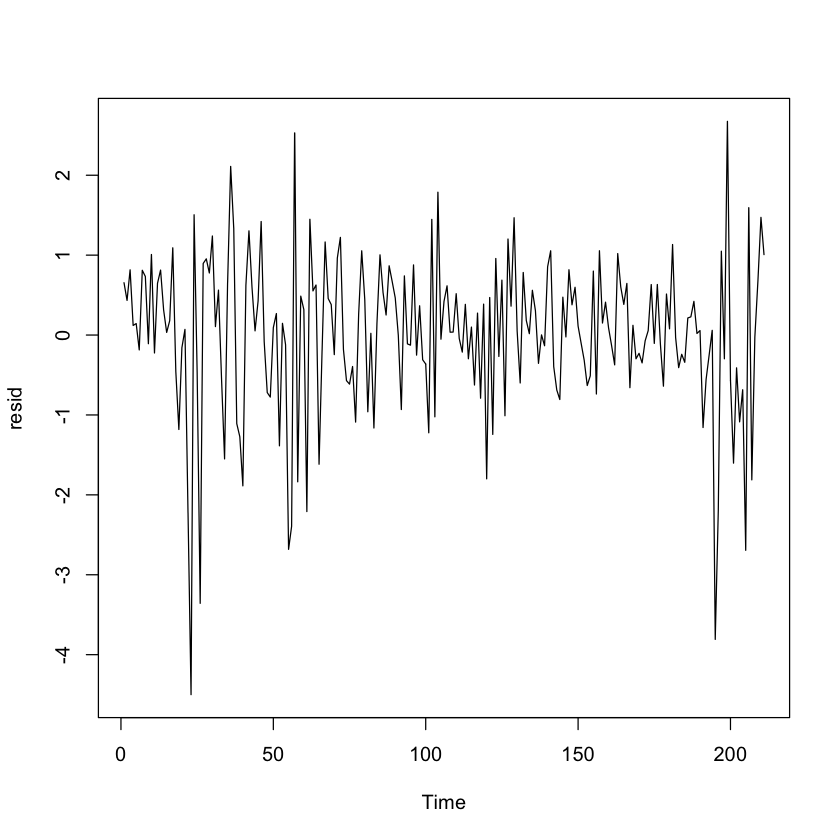

In [16]:
plot(resid)

Residue looks like random, we will use more diagostics for this model

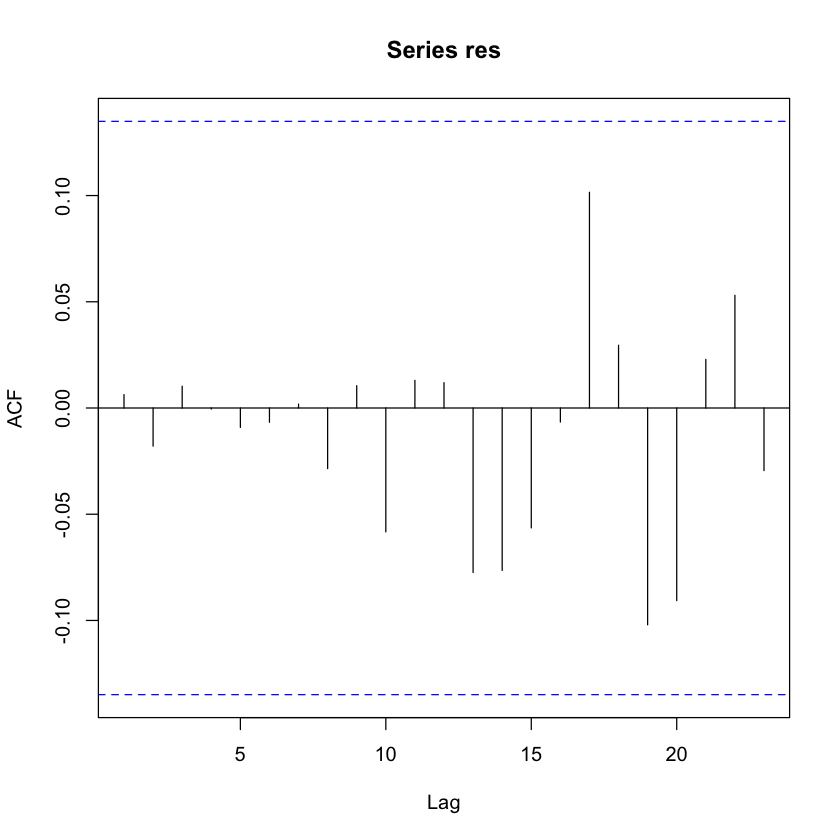

In [14]:
acf(res)

ACF looks good, no outliers!

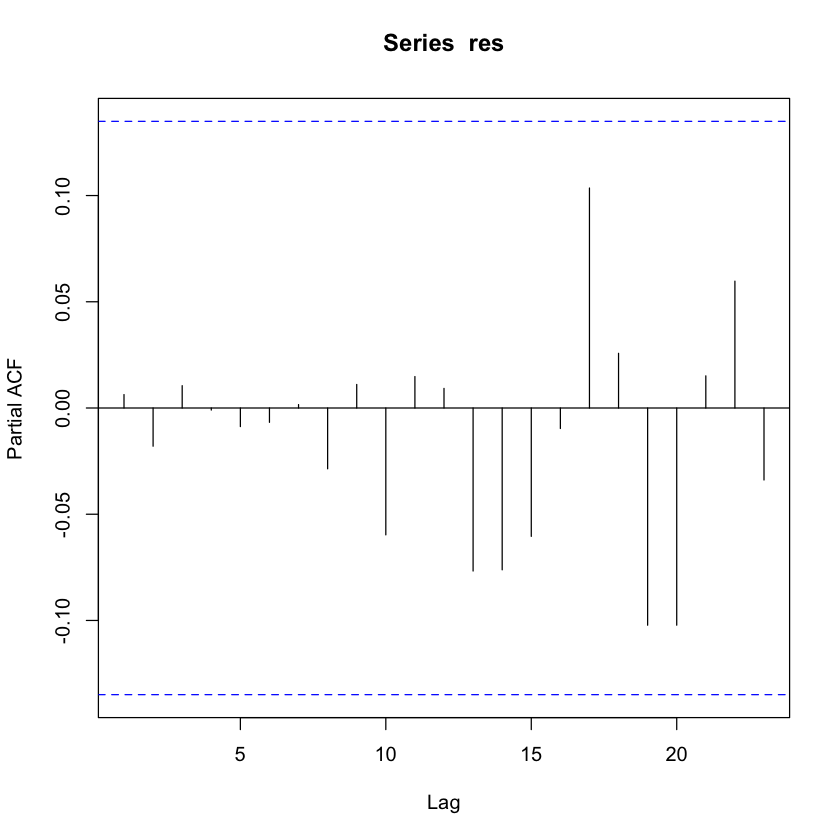

In [15]:
pacf(res)

PACF also works well!

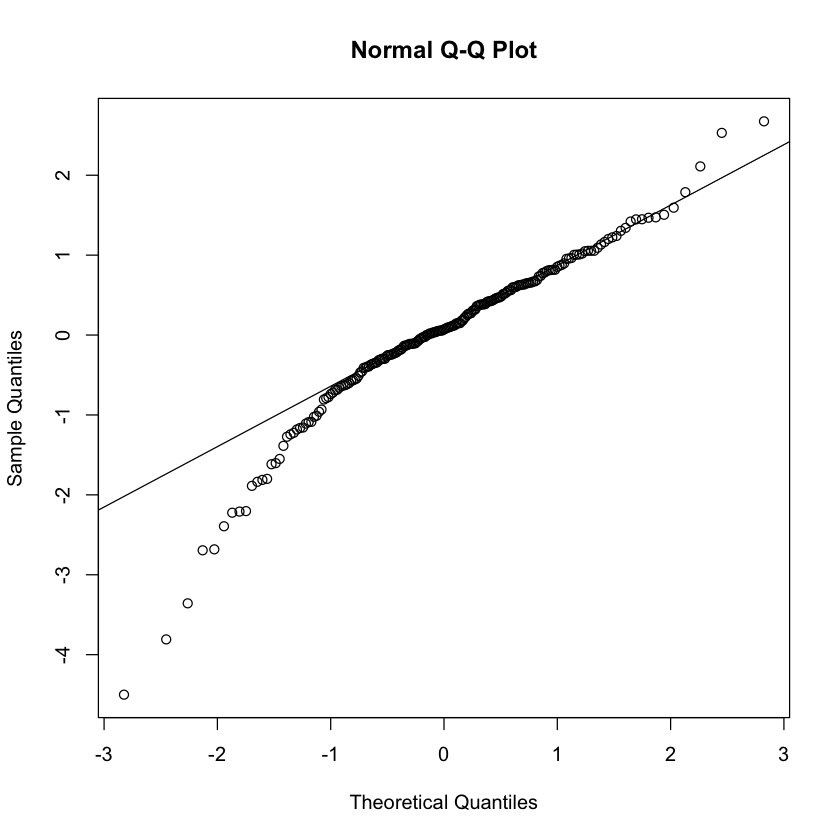

In [17]:
# Use qq-norm to check the normality
qqnorm(resid)
qqline(resid)

qq-plot shows many outliers in the lower end, this worry us and we may need to use another model

In [18]:
# Use run test 
runs(na.omit(resid))

$pvalue
[1] 0.622

$observed.runs
[1] 101

$expected.runs
[1] 105.019

$n1
[1] 93

$n2
[1] 118

$k
[1] 0

p-value is too large for us to reject our hypothesis, which supports our model. The value of obesrved runs is very close to the value of expected runs, which is also good to hear

In [19]:
# Run Ljung Box Tets
Box.test(resid,lag=8, type = "Ljung-Box",fitdf = 1)


	Box-Ljung test

data:  resid
X-squared = 0.30944, df = 7, p-value = 0.9999


Box-test outputs a very high p-value, which means we will not be able to reject our hypotheisis. 

Overall speaking, our model is doing a pretty good job at representing our data, the only thing that worries us is the unusual qq-plot. We may need to do something in the future to correct that